# (7.3) Diagramas de blocos e espaço de estados

<img src="Ex7.7.svg" width="150%"/>

Diagramas de simulação são usados para facilitar a obtenção de equações de estados

Eles permitem visualizar mais facilmente quem são os estados

O bloco fundamental do diagrama é o integrador $1/s$

Utilize a saída dos integradores como variáveis de estado. Dê nome a todas elas antes de iniciar

A **entrada** dos integradores vai fornecer uma equação de estado. Basta interpretar quem compõe o sinal naquele ponto



No caso do diagrama dado, a saída de cada integrador já foi nomeada. Comece pelo último integrador (da direita para esquerda)

A entrada desse integrador é a saída do integrador anterior, isto é, $x_2$. A entrada dele **também** é a derivada da saída, $\dot{x}_3$.

Então, o terceiro integrador fornece a equação de estado:

$$
\begin{align}
    \dot{x}_3 & = x_2
\end{align}
$$ [eq1]

Seguindo raciocínio semelhante para o segundo integrador da direita para esquerda... temos que a entrada dele é a derivada da sua saída, isto é, $\dot{x}_2$, mas também é a saída do primeiro. Então:

$$
\begin{align}
    \dot{x}_2 & = x_1
\end{align}
$$ [eq2]

O último integrador da direita para esquerda possui saída $x_1$. Logo a entrada deve ser $\dot{x}_1$. Porém essa linha coincide com a saída do somador, que é dada pela soma de quatro componentes, 3 realimentadas e uma entrada externa. Assim:

$$
\begin{align}
    \dot{x}_1 & = 6u - 6x_1 - 11x_2 - 6x_3
\end{align}
$$

Note que a saída do sistema coincide com a saída do primeiro integrador da direita para esquerda. Então:
$$
\begin{align}
    y & = x_3
\end{align}
$$

Assim as equações de estado são:

$$
\begin{align}
    \dot{x}_1 & = 6u - 6x_1 - 11x_2 - 6x_3\\
    \dot{x}_2 & = x_1\\
    \dot{x}_3 & = x_2\\
    y &= x_3
\end{align}
$$

Transformar as equações para a forma matricial é fácil. Basta escrever as matrizes e identificar os coeficientes. Cada linha da matriz faz você buscar em uma equação. Cada coluna faz vc buscar em uma variável diferente.

No exemplo: o sistema é de 3a ordem, então as matrizes $F$, $G$, $H$ e $J$ serão respectivamente 3x3, 3x1, 1x3 e 1x1.

A primeira linha da matriz $F$ é dada pela primeira equação. Para a primeira coluna, verificamos quem é o coeficiente de $x_1$ (-6). Para a segunda coluna, o coeficiente de $x_2$ (-11), e assim por diante. Para a matriz $G$, basta ver quem é o coeficiente de $u$. Desta forma, temos:
$$
\begin{align}
    \mathbf{F} &= \left[\begin{array}{rrr} -6 & -11 & -6\\1 & 0 & 0 \\ 0 & 1 & 0\end{array}\right] \\
    \mathbf{G} &= \left[\begin{array}{r}6 \\ 0 \\ 0\end{array}\right] \\
    \mathbf{H} &= \left[\begin{array}{rrr} 0&0&1\end{array}\right] \\
    J &= 0
\end{align}
$$



In [1]:
#!pip install control
import control as ct
import numpy as np
import matplotlib.pyplot as plt

F = np.array([[-6,-11,-6],[1,0,0],[0,1,0]])
G = np.array([[6],[0],[0]])
H = np.array([0,0,1])
J = 0

sys = ct.ss(F,G,H,J)
print(sys)

<LinearIOSystem>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[ -6. -11.  -6.]
     [  1.   0.   0.]
     [  0.   1.   0.]]

B = [[6.]
     [0.]
     [0.]]

C = [[0. 0. 1.]]

D = [[0.]]



Verifique que esse sistema realmente produz a função de transferência original:

In [2]:
ct.tf(sys)              # Transforma espaço de estados para FT original

TransferFunction(array([6.]), array([ 1.,  6., 11.,  6.]))

In [4]:
ct.damp(sys)

_____Eigenvalue______ Damping___ Frequency_
        -3                     1          3
        -2                     1          2
        -1                     1          1


(array([3., 2., 1.]), array([1., 1., 1.]), array([-3.+0.j, -2.+0.j, -1.+0.j]))

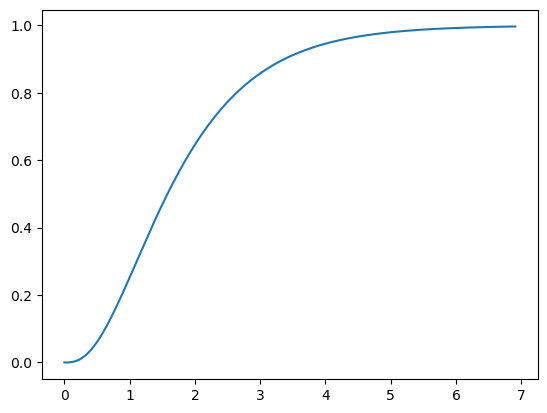

In [3]:
t,y = ct.step_response(sys)         # Respsota ao degrau do sistema em malha aberta pra não perder o costume
plt.plot(t,y)